# <FONT SIZE=5 COLOR="purple"> **Modelo de Regresión - Entrega Final Machine Learning** </FONT>

- Buscar un conjunto de datos (>2000 registros) al cuál se le pueda aplicar algoritmos de regresión.Es decir, que busque predecir una variable numérica continua.


- Explorar los datos

- Aplicar modelos: knn, regresión lineal, SVR

- Evaluar los modelos y seleccionar el mejor.

- Hacer algunas prediccion

## <FONT SIZE=5 COLOR="purple"> **Carga de los datos desde kaggle - global_disaster_response_2018** </FONT>  

---

Para este modelo, obtuvimos los datos de [aqui](https://www.kaggle.com/datasets/mubeenshehzadi/global-disaster-2018-2024)

In [ ]:
import kagglehub
import os
import pandas as pd

In [ ]:
path = kagglehub.dataset_download("mubeenshehzadi/global-disaster-2018-2024")
print(path)


Using Colab cache for faster access to the 'global-disaster-2018-2024' dataset.
/kaggle/input/global-disaster-2018-2024


In [ ]:
for f in os.listdir(path):
    print(f)


global_disaster_response_2018_2024.csv


In [ ]:
df_desastres = pd.read_csv(path + "/global_disaster_response_2018_2024.csv")
df_desastres.head()


,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [ ]:
df_desastres = df_desastres.drop(["latitude", "longitude"], axis = 1)

## <FONT SIZE=5 COLOR="purple"> **Carga de las librerias necesarias** </FONT>

---


In [ ]:
# --- Librerías Principales (Datos y Gráficos) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings
from itertools import cycle # Útil para gráficos ROC

# --- Gráficos Específicos (Árboles y Colores) ---
from graphviz import Source
from sklearn.tree import export_graphviz
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch

# --- Preprocesamiento y Herramientas de Datos ---
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, LabelEncoder,
                                   OneHotEncoder, label_binarize)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris

# --- Selección y Optimización de Modelos ---
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     RandomizedSearchCV)

# --- Modelos de Clasificación ---
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# --- Modelos de Regresión ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# --- Métricas de Evaluación ---
from sklearn import metrics
from sklearn.metrics import (
    # Métricas de Clasificación
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, roc_auc_score,

    # Métricas de Regresión
    mean_squared_error, r2_score, mean_absolute_error
)
from imblearn.metrics import specificity_score

# --- Configuración (Opcional) ---
# Para omitir los warnings
warnings.filterwarnings("ignore")

from plotly.graph_objs import Figure

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor # Nota: Regressor, no Classifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

## <FONT SIZE=5 COLOR="purple"> **Exploración de los datos** </FONT>

---



In [ ]:
print("Los datos tienen " + str(df_desastres.shape[0]) + " filas y " + str(df_desastres.shape[1]) + " columnas \n")

print(f"Los tipos de datos en las son las siguientes: \n{df_desastres.dtypes} \n")

print("Verificamos si hay datos faltantes:")
print(df_desastres.isna().sum(), "\n")

print("Ahora analizaremos sus estadísticas descriptivas:")
round(df_desastres.describe(), 3)

Los datos tienen 50000 filas y 10 columnas 

Los tipos de datos en las son las siguientes: 
date                          object
country                       object
disaster_type                 object
severity_index               float64
casualties                     int64
economic_loss_usd            float64
response_time_hours          float64
aid_amount_usd               float64
response_efficiency_score    float64
recovery_days                  int64
dtype: object 

Verificamos si hay datos faltantes:
date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
dtype: int64 

Ahora analizaremos sus estadísticas descriptivas:


,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days
count,50000.000,50000.000,5.000000e+04,50000.000,50000.000,50000.000,50000.000
mean,5.016,100.591,5.068593e+06,12.183,250000.329,87.574,49.683
std,1.943,65.052,3.268541e+06,9.259,143227.514,10.189,20.099
min,1.000,0.000,5.273900e+02,1.000,16.600,29.750,2.000
25%,3.660,51.000,2.585513e+06,6.270,142966.335,83.060,36.000
50%,4.990,91.000,4.548351e+06,10.510,230536.470,89.180,49.000
75%,6.340,138.000,6.950615e+06,15.450,335225.930,94.700,63.000
max,10.000,524.000,2.445624e+07,63.100,1126465.230,100.000,112.000


Podemos ver que no hay datos faltantes que las variables. Tenemos el siguieente diccionario de varaibles.



*   date: fecha cuando ocurrio el desastre.
*   country: Pais en donde ocurrio el desastre.
*   disaster_type: Tipo de desastre que occurio.
*   severity_index: indice el cual describe que tan dañino o que tanto impacto tuvo el desastre natural.
*   casualties: Numero de personas afectadas o fallecidas.
*   economic_loss_usd: Perdida economica ocasionada por el desastre en dolares.
*   response_time_hours: Tiempo de respuesta de ayude medido en horas.
*   aid_amount_usd: Cantidad de ayuda medida en dolares.
*   response_efficiency_score: puntuaje que representa que tan bien atendida estuvo la emergencia.
*   recovery_days: Dias que tuvo de recuperación el lugar despues del desastre




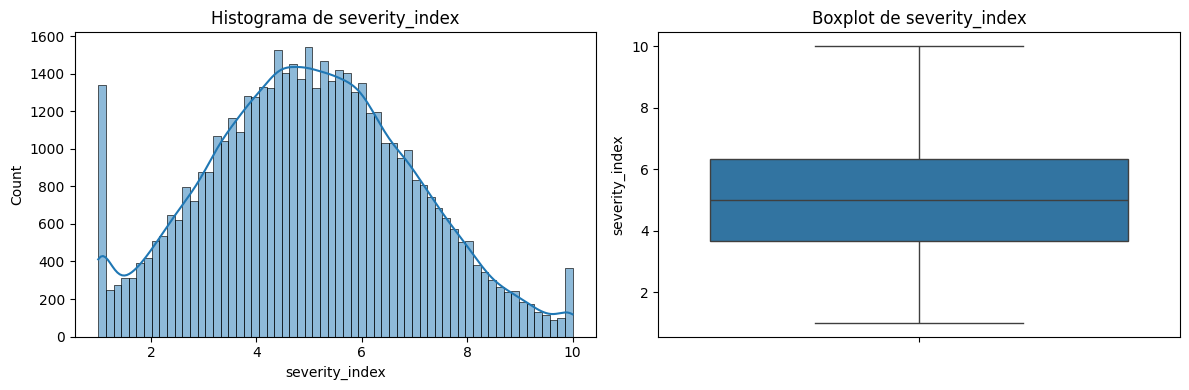

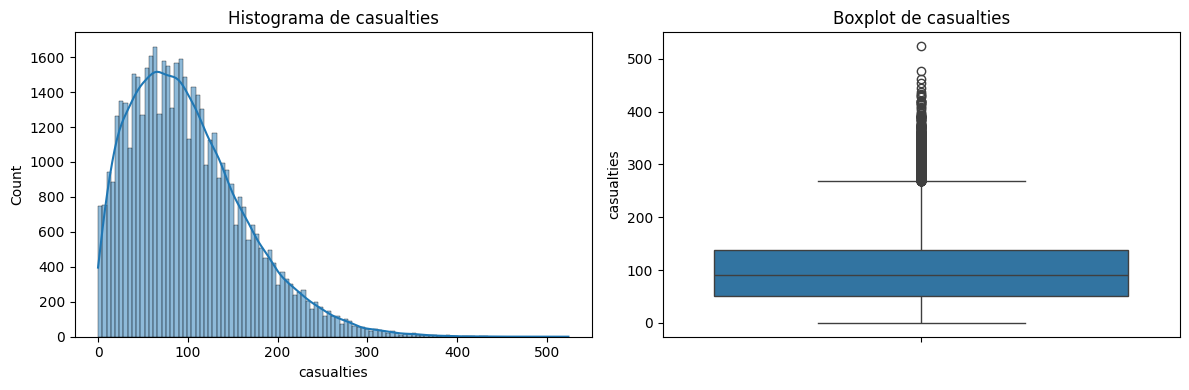

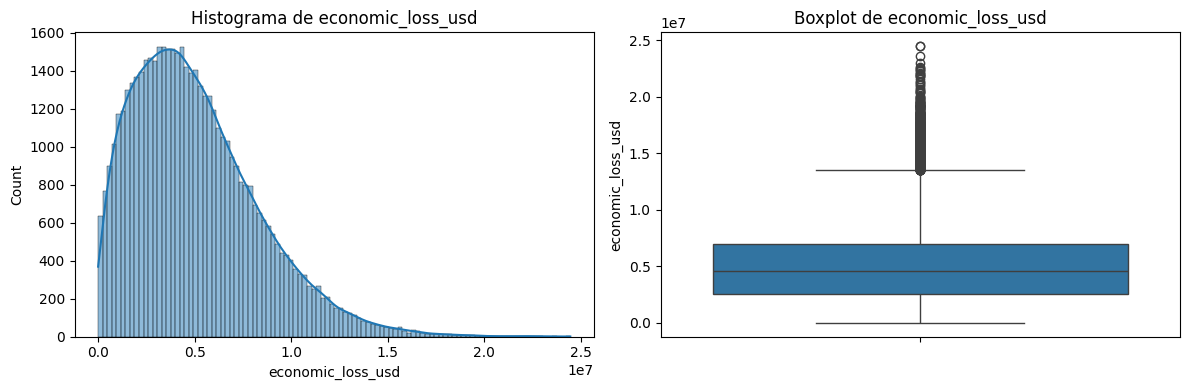

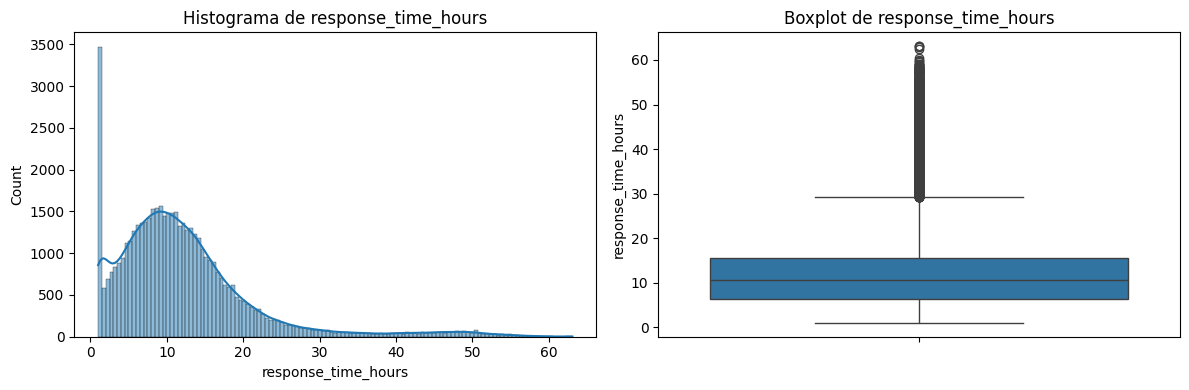

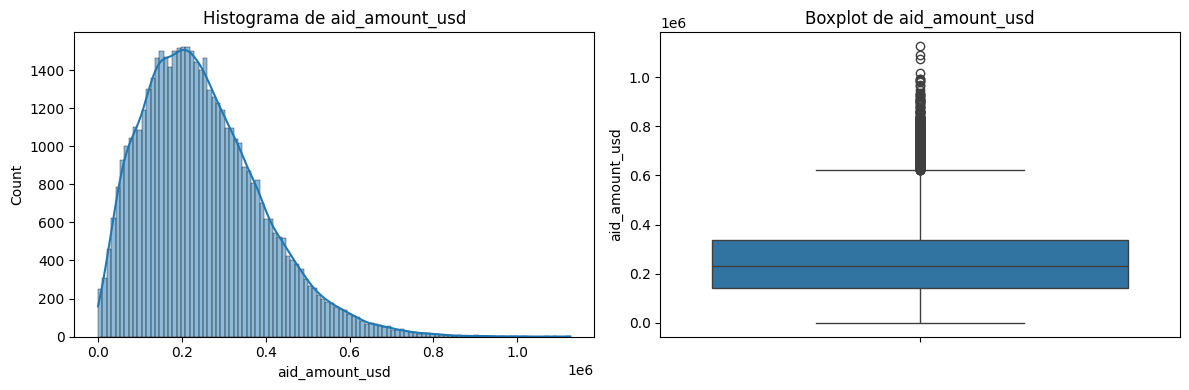

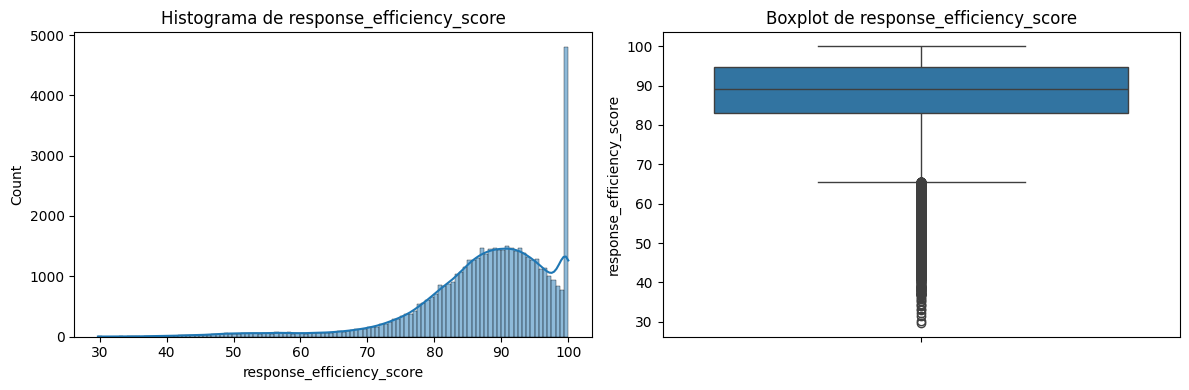

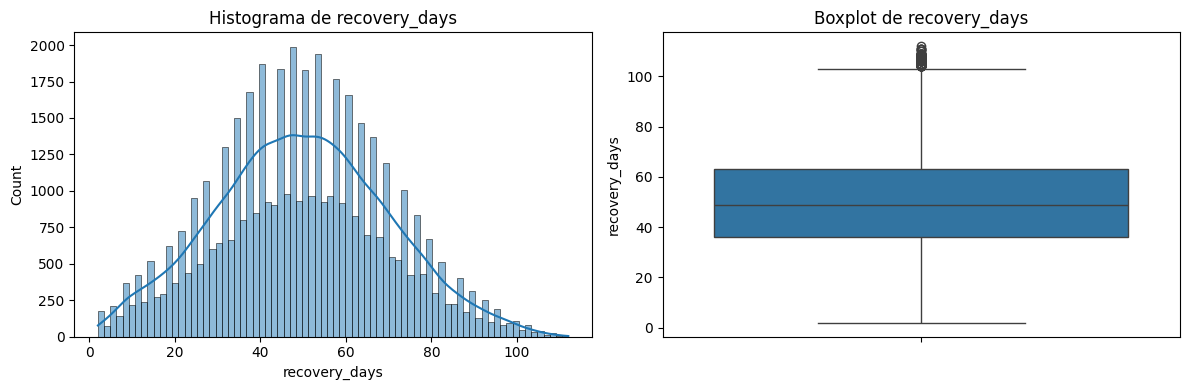

In [ ]:
datos_p1_graficas = df_desastres.copy()


for col in datos_p1_graficas.select_dtypes(include=np.number).columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  sns.histplot(datos_p1_graficas[col], kde=True, ax=axes[0])
  axes[0].set_title(f'Histograma de {col}')

  sns.boxplot(datos_p1_graficas[col], ax=axes[1])
  axes[1].set_title(f'Boxplot de {col}')

  plt.tight_layout()
  plt.show()
  print("\n")

Podemos ver que en este caso las variables "recovery_days" y "severity index" cuentan con un comportamiento muy cercano a la normalidad. Tambien vemos que hay variables con sesgo a cola derecha como lo son "casulaties", "economic_loss_usd", "response_time_hours"y "aid_amount_usd". La unica variable que cuenta con un sesgo a cola izquierda es "response_efficiency_score".

Para este caso fueron omitidos las variables "latitud" y "longitud" ya que estas son variables que describen ubicaciones, y seguramente su grafica no tenga ninguna forma diferente a la de un cuadrado.

disaster_type
Landslide            5130
Earthquake           5068
Flood                5039
Hurricane            5002
Extreme Heat         5001
Storm Surge          4988
Volcanic Eruption    4983
Wildfire             4954
Tornado              4939
Drought              4896
Name: count, dtype: int64


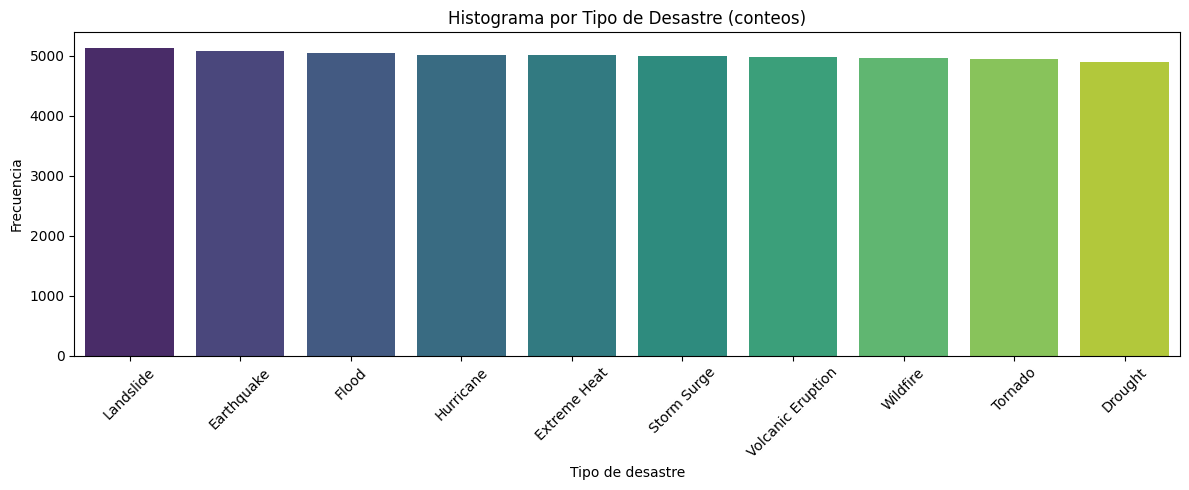

In [ ]:
disaster_counts = df_desastres['disaster_type'].value_counts()
print(disaster_counts)

plt.figure(figsize=(12, 5))

sns.barplot(
    x=disaster_counts.index,
    y=disaster_counts.values,
    palette="viridis"
)

plt.title("Histograma por Tipo de Desastre (conteos)")
plt.xlabel("Tipo de desastre")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos ver que los tipos de desastres cuentan con un numero de registros casi similar entre todos, osilando los 5000 registros por tipo de desastre natural registrado

In [ ]:
# Contar número de desastres por país
df_country_counts = df_desastres['country'].value_counts().reset_index()
df_country_counts.columns = ['country', 'count']

# Crear mapa choropleth
fig = px.choropleth(
    df_country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    color_continuous_scale="YlOrRd",
    title="Número de Desastres por País (2018–2024)",
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    height=600
)

# 👉 Guardar figura como HTML
fig.write_html("desastres_por_pais.html")

fig.show()



Según el mapa, podemos ver que el pais donde mas desastres se encuentran registrados es Brazil, este podria estar seguido de Autralia, China o Chile. Ademas, se ve que no todos los paises cuentan con datos de desastres registrados.

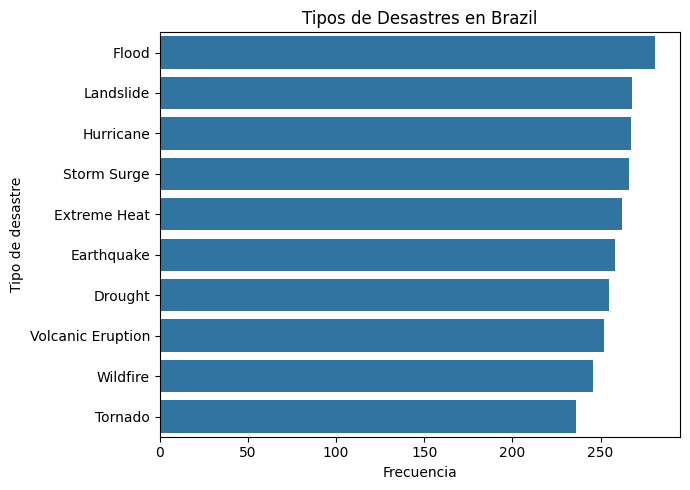

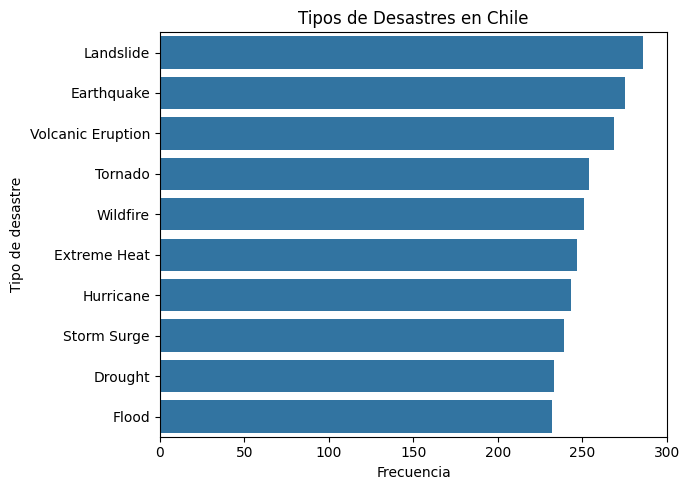

In [ ]:
df_bc = df_desastres[df_desastres['country'].isin(['Brazil', 'Chile'])]


paises = df_bc['country'].unique()
for pais in paises:
    plt.figure(figsize=(7, 5))

    df_pais = df_bc[df_bc['country'] == pais]

    disaster_counts = df_pais['disaster_type'].value_counts().reset_index()
    disaster_counts.columns = ['disaster_type', 'count']

    disaster_sorted = disaster_counts.sort_values(by='count', ascending=False)

    sns.barplot(
        x='count',
        y='disaster_type',
        data=disaster_sorted
    )

    plt.title(f'Tipos de Desastres en {pais}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Tipo de desastre')
    plt.tight_layout()
    plt.show()

    print("\n")


Gracias a los histogramas por frecuencias, proceederemos a analizar los desastres que afectaron a los paises de Sudamerica que tienen registros el dataframe, podemos ver que para Brazil los desastres mas comunes en las fechar registradas fueron inundaciones y derrumbes. Por otro lado, las que menos ocurrencias tuvieron fueron tornados e incendios.

Chile tuvo como los desastres naturales mas frecuentes a los derrumbes y los temblores, esto puede ser por su ubicación cerca a la falla de San Andres. Y como menos frecuentes tenemos inundaciones y seguias.

Promedio de Días de Recuperación
country
Brazil    49.805095
Canada    49.648072
Name: recovery_days, dtype: float64


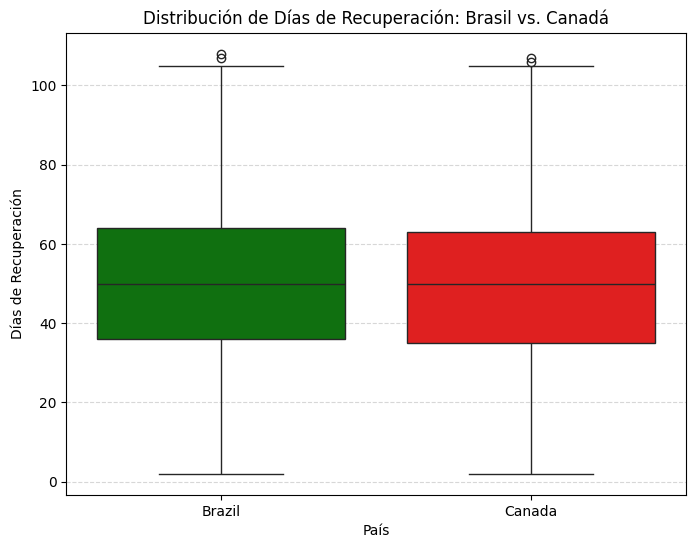

In [ ]:
paises_interes = ['Brazil', 'Canada']
df_comparacion = df_desastres[df_desastres['country'].isin(paises_interes)]

medias = df_comparacion.groupby('country')['recovery_days'].mean()
print("Promedio de Días de Recuperación")
print(medias)

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_comparacion,
    x='country',
    y='recovery_days',
    palette=['green', 'red']
)

plt.title("Distribución de Días de Recuperación: Brasil vs. Canadá")
plt.xlabel("País")
plt.ylabel("Días de Recuperación")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Podemos ver que el promedio y los boxplots de los dias de recuperación despues de una catastrofe entre Brazil y Canada son muy similares, entonces esto nos servira a futuro para entender y darle sentido a las predicciones

## <FONT SIZE=5 COLOR="purple"> **Aplicación de modelos** </FONT>

---


In [ ]:
df_modelado = df_desastres.copy()

if 'date' in df_modelado.columns:
    df_modelado = df_modelado.drop('date', axis=1)

df_modelado = pd.get_dummies(df_modelado, columns=['country', 'disaster_type'], drop_first=True)

Vamos a eliminar la fecha, ya que esta no es relevante para la predicción y puede generar errores por su forma.

In [ ]:
objetivo = 'recovery_days'
lista_resultados = []

try:
    X = df_modelado.drop(objetivo, axis=1)
    y = df_modelado[objetivo]
except KeyError:
    print(f"Error: No se encontró la columna '{objetivo}' en el dataframe.")

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
                                                    # Eliminamos stratify=y

Separamos los datos aleatoriamente en el conjunto de entrenamiento y de prueba

In [ ]:
modelos_regresion = [
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Regresión Lineal', LinearRegression()),
    ('SVR', SVR())
]

modelos_entrenados = {}
lista_resultados = []

print("Entrenando modelos...\n")

for nombre, modelo in modelos_regresion:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', modelo)
    ])

    pipeline.fit(X_train, y_train)
    modelos_entrenados[nombre] = pipeline

    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    lista_resultados.append({
        'Modelo': nombre,
        'R2 Score': r2,
        'RMSE': rmse,
        'MAE': mae
    })

resultados_df = pd.DataFrame(lista_resultados)
print(resultados_df)

Entrenando modelos...

             Modelo  R2 Score      RMSE       MAE
0               KNN  0.839825  8.090713  6.306880
1  Regresión Lineal  0.938982  4.993641  3.973325
2               SVR  0.924784  5.544261  4.382554


Calculamos y obtenemos los resultados de todos los modelos que se piden usar en el enunciado

## <FONT SIZE=5 COLOR="purple"> **Evaluación de modelos** </FONT>

---

Se va a analizar los resultados de la predicción mediante el mejor modelo, que para este caso fue la regresión lineal.

In [ ]:
mejor_modelo = modelos_entrenados['Regresión Lineal']

Ahora, vamos a ver un scatter plot que mapea la predición vs la realidad de las predicciones del modelo.

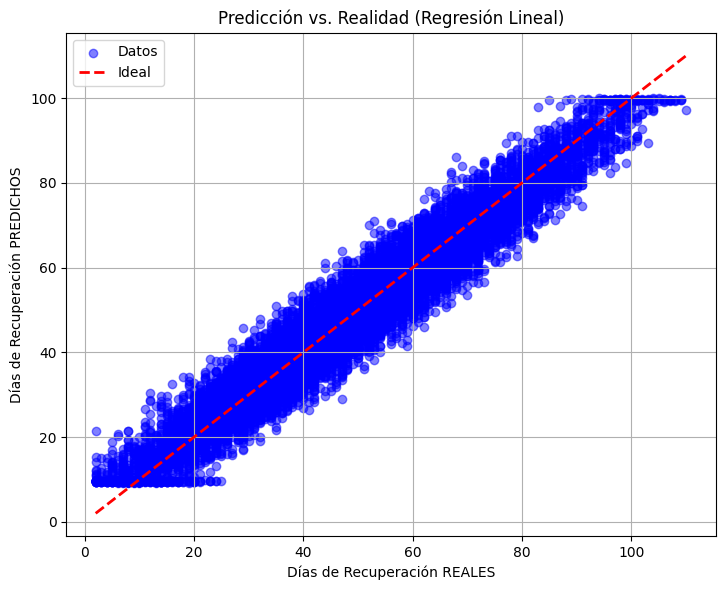

In [ ]:
y_pred_final = mejor_modelo.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_final, alpha=0.5, color='blue', label='Datos')

min_val = y_test.min()
max_val = y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal')
plt.title("Predicción vs. Realidad (Regresión Lineal)")
plt.xlabel("Días de Recuperación REALES")
plt.ylabel("Días de Recuperación PREDICHOS")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## <FONT SIZE=5 COLOR="purple"> **Hacer predicciones** </FONT>

---

In [ ]:
muestras_prueba = X_test.sample(5, random_state=42)
valores_reales = y_test.loc[muestras_prueba.index]

predicciones = mejor_modelo.predict(muestras_prueba)

comparativa = pd.DataFrame({
    'Días Reales': valores_reales,
    'Días Predichos': predicciones,
    'Diferencia (Error)': abs(valores_reales - predicciones)
})

print("--- 5 Predicciones de Ejemplo ---")
print(comparativa)

--- 5 Predicciones de Ejemplo ---
       Días Reales  Días Predichos  Diferencia (Error)
45040           77       71.528422            5.471578
20713           76       80.251166            4.251166
9836            31       38.445368            7.445368
44734           42       37.901153            4.098847
40160           27       33.937921            6.937921


En este caso, tomamos predicciones que fueron hechas en la base de datos, y podemos ver que cuentan con un error entre 4 y 7 dias de diferencia, lo cual no es malo para los datos reales.

A continuación vamos a inventar dos escenarios ficticios:

*Terremoto fuerte en Brazil*: en donde hay una perdida economica alta y la respuesta por horas es de mas de dos dias, ademas vamos a simular una baja inversión en la ayuda economica y una atención a emergencia mala.

*Inundación leve en Canada*: En donde dado que es un pais mas avanzado que Brazil, este va a destinar mas dinero y cuenta con menos tiempo de respuesta y una mayor eficiencia de reaccion.

In [ ]:
datos_inventados = {
    'severity_index': [9.5, 2.5],
    'casualties': [350, 10],
    'economic_loss_usd': [15000000, 50000],
    'response_time_hours': [48.5, 2.5],
    'aid_amount_usd': [50000, 2000000],
    'response_efficiency_score': [30.5, 95.0],

    'country': ['Brazil', 'Canada'],
    'disaster_type': ['Earthquake', 'Flood']
}


df_nuevos = pd.DataFrame(datos_inventados)
df_nuevos_dummies = pd.get_dummies(df_nuevos, columns=['country', 'disaster_type'], drop_first=True)

df_nuevos_final = df_nuevos_dummies.reindex(columns=X_train.columns, fill_value=0)

predicciones_inventadas = mejor_modelo.predict(df_nuevos_final)


print("Resultados de la Simulación")
for i, dias in enumerate(predicciones_inventadas):
    caso = "Catastrófico (Brasil)" if i == 0 else "Leve (Canadá)"
    print(f"Caso {i+1} [{caso}]: El modelo predice {dias:.2f} días de recuperación.")

Resultados de la Simulación
Caso 1 [Catastrófico (Brasil)]: El modelo predice 94.87 días de recuperación.
Caso 2 [Leve (Canadá)]: El modelo predice 24.38 días de recuperación.


Los resultados que tenemos tienen sentido, dado que a un pais con menos recursos, peor atención y con un desastre natural mas mas fuerte su recuperación tiene sentido que sea mayor.

Entonces esta comparación es satisfactoria, y decimos que dado que el modelo predice el 0.94 de la varianza aproximadamente de una manera coherente. Esto podria ayudar a destinar presupuestos para atención de desastres en paises que paguen a sus equipos de emergencia por horas.

Se pudo aplicar lo aprendido en clase acerca de un modelo de regresión de machine learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to PDF /content/drive/MyDrive/Modelo_Regresión_MCG.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Modelo_Regresión_MCG.ipynb to PDF
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Modelo_Regresión_MCG_files/
[NbConvertApp] Making directory ./Modelo_Regresión_MCG_files
[NbConvertApp] Writing 71508 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 514989 bytes to /content/drive/MyDrive/Modelo_Regresión_MCG.pdf
